In [1]:
import sklearn
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])


In [2]:
np.random.seed(44)
wine_dataset = pd.read_csv("wine_dataset.csv")
print(wine_dataset.info())
wine_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
class                      5000 non-null int64
Alcohol                    5000 non-null float64
Malic_acid                 5000 non-null float64
Ash                        5000 non-null float64
Alcalinity_of_ash          5000 non-null float64
Magnesium                  5000 non-null float64
Total_phenols              5000 non-null float64
Flavanoids                 5000 non-null float64
Nonflavanoid_phenols       5000 non-null float64
Proanthocyanins            5000 non-null float64
Color_intensity            5000 non-null float64
Hue                        5000 non-null float64
Od_Hod_of_diluted_wines    5000 non-null float64
Proline                    5000 non-null float64
dtypes: float64(13), int64(1)
memory usage: 547.0 KB
None


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,2,11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,3,12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,1,13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,3,11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492


In [3]:
# normalize features for better performance 
from sklearn import preprocessing
target = wine_dataset["class"]
x = wine_dataset.values # convert to numpy array
print(x.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled.shape)
wine_dataset = pd.DataFrame(x_scaled, columns=wine_dataset.columns)
wine_dataset["class"] = target
wine_dataset.head()

(5000, 14)
(5000, 14)


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,0.726791,0.085805,0.432125,0.200468,0.392663,0.452788,0.559874,0.477090,0.489749,0.163244,0.635628,0.584439,0.399009
1,2,0.237919,0.142156,0.437079,0.357903,0.368467,0.599717,0.382811,0.322602,0.258369,0.665030,0.790293,0.571170,0.065151
2,3,0.437744,0.220358,0.576004,0.564587,0.200303,0.326101,0.097921,0.662590,0.341220,0.640008,0.192992,0.156748,0.258989
3,1,0.541419,0.232330,0.259309,0.252821,0.414189,0.581132,0.615985,0.261494,0.381721,0.438447,0.341653,0.884296,0.417983
4,3,0.204211,0.440507,0.910246,0.337946,0.184095,0.430953,0.137943,0.273130,0.428986,0.771760,0.269215,0.559762,0.156864


In [4]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2, random_state=30)
for train_ind, test_ind in split.split(wine_dataset, wine_dataset["class"]):
    strat_train_set = wine_dataset.loc[train_ind]
    strat_test_set = wine_dataset.loc[test_ind]

In [5]:
train_set = strat_train_set
test_set = strat_test_set

In [6]:
# stratified sampling is not needed
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1725 to 3709
Data columns (total 14 columns):
class                      4000 non-null int64
Alcohol                    4000 non-null float64
Malic_acid                 4000 non-null float64
Ash                        4000 non-null float64
Alcalinity_of_ash          4000 non-null float64
Magnesium                  4000 non-null float64
Total_phenols              4000 non-null float64
Flavanoids                 4000 non-null float64
Nonflavanoid_phenols       4000 non-null float64
Proanthocyanins            4000 non-null float64
Color_intensity            4000 non-null float64
Hue                        4000 non-null float64
Od_Hod_of_diluted_wines    4000 non-null float64
Proline                    4000 non-null float64
dtypes: float64(13), int64(1)
memory usage: 468.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 387 to 4415
Data columns (total 14 columns):
class                      1000 non-null int

(None, None)

In [7]:
train_y = train_set[["class"]]
train_X = train_set.drop("class", axis=1)
test_y = test_set[["class"]]
test_X = test_set.drop("class", axis=1)

In [8]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(train_X, train_y.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [9]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(train_X)
accuracy = accuracy_score(train_y, ufc_train_predictions)
print(accuracy)
print(classification_report(train_y, ufc_train_predictions))

0.93425
              precision    recall  f1-score   support

           1       0.93      0.94      0.94      1262
           2       0.93      0.94      0.93      1610
           3       0.94      0.93      0.93      1128

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



In [10]:
# simple cross val scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, train_X, train_y.values.ravel(),
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.92248248, 0.93743783, 0.93284071, 0.94497749, 0.9100434 ,
        0.93995384, 0.91993452, 0.89443017, 0.9099556 , 0.94260737]),
 0.9254663424899802)

In [11]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X.iloc[train_index]
            train_y_folds = train_y.iloc[train_index]
            test_X_fold = train_X.iloc[test_index]
            test_y_fold = train_y.iloc[test_index]
            classifier.fit(train_X_folds.values, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [12]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [13]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [14]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [15]:
neural_net

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

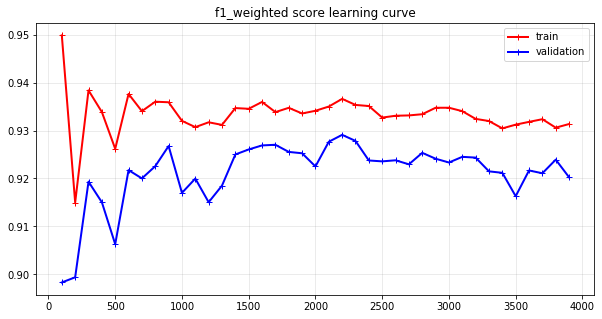

In [16]:
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 50), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9246619853048113


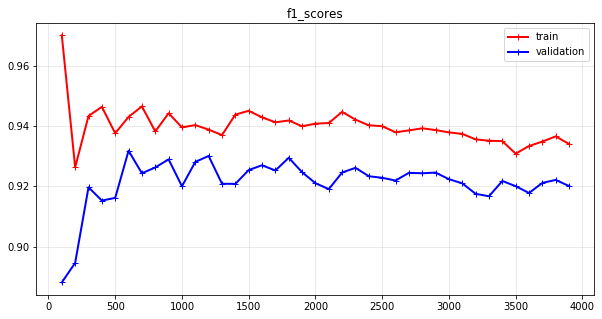

In [17]:
# check it with f1_weighted
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(3,5), (30,50), (200,400)],
    "alpha" : [0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling'],
}
search_f1 = GridSearchCV(MLPClassifier(), param_grid, cv=10, 
                         scoring='f1_weighted', n_jobs=-1)
search_f1.fit(train_X, train_y.values.ravel())

print(search_f1.best_estimator_, search_f1.best_score_)

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9249178307938649


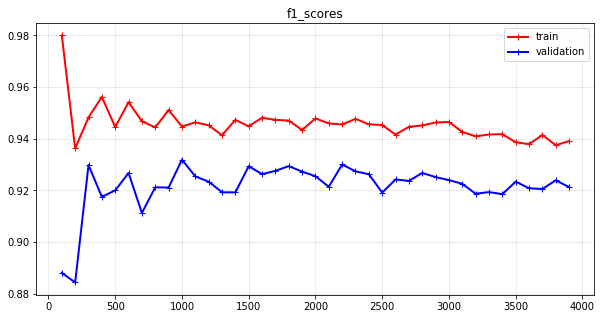

In [18]:
# check it with f1_weighted
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50), (30,50), (50, 70)],
    "alpha" : [0.01, 0.001],
    'learning_rate': ['invscaling'],
    'learning_rate_init': [0.01, 0.001, 0.0001]
}
search_f1 = GridSearchCV(MLPClassifier(), param_grid, cv=10, 
                         scoring='f1_weighted', n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())

print(search_f1.best_estimator_, search_f1.best_score_)

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9254547344334941


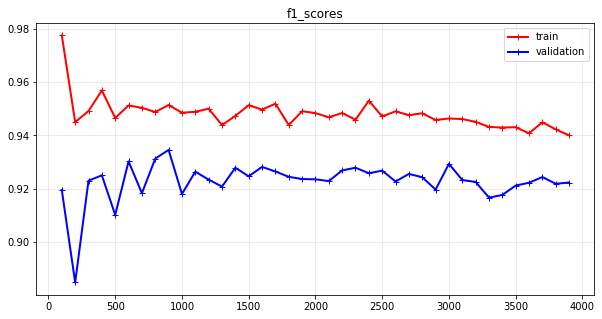

In [19]:
# check it with f1_weighted
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50), (60,60), (40, 40)],
    "alpha" : [0.1, 0.01],
    'learning_rate': ['invscaling'],
}
search_f1 = GridSearchCV(MLPClassifier(), param_grid, cv=10, 
                         scoring='f1_weighted', n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())

print(search_f1.best_estimator_, search_f1.best_score_)

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


[0.94203222 0.94400679 0.94183724 0.94358416 0.93825693 0.93827088
 0.92672356 0.92361749] [0.92623626 0.92112484 0.92016771 0.92472311 0.9244463  0.92312476
 0.92348842 0.9229617 ] [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]


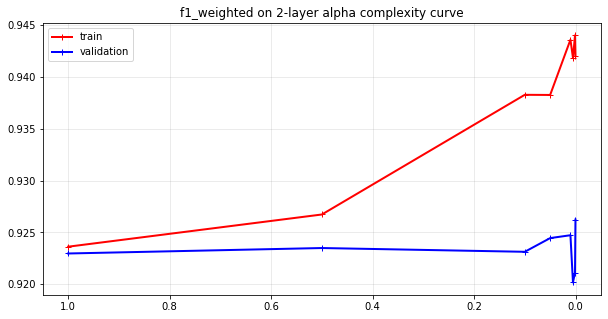

In [20]:
from sklearn.model_selection import validation_curve
net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

param_range = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

train_scores, test_scores = validation_curve(
    net, train_X, train_y.values.ravel(), param_name="alpha", 
    param_range=param_range, scoring='f1_weighted', verbose=1, cv=10, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='f1_weighted on 2-layer alpha complexity curve', inverse_x=True)

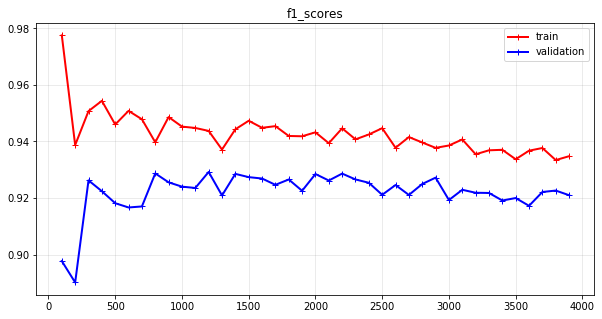

In [21]:
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, best_net, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

In [22]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix

best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


best_net.fit(train_X, train_y.values.ravel())
test_predictions = best_net.predict(test_X)
print(classification_report(test_y, test_predictions, digits=5))
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

           1    0.94249   0.93651   0.93949       315
           2    0.94815   0.95285   0.95050       403
           3    0.93972   0.93972   0.93972       282

    accuracy                        0.94400      1000
   macro avg    0.94345   0.94303   0.94323      1000
weighted avg    0.94399   0.94400   0.94399      1000

[[295  13   7]
 [  9 384  10]
 [  9   8 265]]
